### Data Science Homework 2

### Rania Siddiqui (rs07494)
### rs07494@st.habib.edu.pk

## Exploratory data anaylysis (EDA)

In [1]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline  

In [3]:
# part 1 of the homework
df = pd.read_csv('FIFA_Players_Data.csv')
df.head(5)

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


### Checking data types

In [6]:
df.dtypes

sofifa_id                     int64
short_name                   object
long_name                    object
age                           int64
dob                          object
height_cm                     int64
weight_kg                     int64
nationality                  object
club                         object
overall                       int64
potential                     int64
player_positions             object
preferred_foot               object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
body_type                    object
real_face                    object
release_clause_eur          float64
team_position                object
team_jersey_number          float64
joined                       object
contract_valid_until        float64
nation_position              object
nation_jersey_number        float64
pace                        float64
shooting                    

### Checking total records

In [10]:
df.shape

(15465, 34)

In [13]:
df.count()

sofifa_id                   15465
short_name                  15465
long_name                   15465
age                         15465
dob                         15465
height_cm                   15465
weight_kg                   15465
nationality                 15465
club                        15465
overall                     15465
potential                   15465
player_positions            15465
preferred_foot              15465
international_reputation    15465
weak_foot                   15465
skill_moves                 15465
work_rate                   15465
body_type                   15465
real_face                   15465
release_clause_eur              0
team_position               15233
team_jersey_number          15233
joined                      14314
contract_valid_until        15226
nation_position              1056
nation_jersey_number         1056
pace                        13762
shooting                    13762
passing                     13762
dribbling     

### Checking duplicates 

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 34)


In [18]:
sum(df.duplicated())

0

### Handling missing values

In [21]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur          15465
team_position                 232
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling     

### Percentage of missing values

In [27]:
### I am finding out the percentage of missing values so i can know which columns to drop.

In [29]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).round(2).sort_values(by='percent_missing',ascending=False).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,release_clause_eur,100.00
1,nation_jersey_number,93.17
2,nation_position,93.17
3,pace,11.01
4,physic,11.01
5,defending,11.01
6,dribbling,11.01
7,passing,11.01
8,shooting,11.01
9,joined,7.44


In [32]:
df = df.drop(['release_clause_eur'], axis = 1) #dropped the empty column
df = df[df['nation_position'] != 'GK'] # dropping GK rows

### Impute or replace missing values

In [35]:
columns_to_fill = ['joined', 'nation_position', 'team_position', 'contract_valid_until']

for column in columns_to_fill:
    df.fillna({column: df[column].mode()[0]}, inplace=True)


##### Using mode for filling nan values, because all of these are categorical data so using mode is an appropiate choice.  

In [38]:
columns_to_fill = ['team_jersey_number', 'nation_jersey_number']
for column in columns_to_fill:
    df.fillna({column: df[column].median()}, inplace=True)

In [43]:
### For team and nation jersey number, i have used median to fill in the missing values since these are ordinal numerical columns.

In [45]:
import re

def process_skill_power(value):
    # Check if value is a string with + or - sign
    if isinstance(value, str):
        # Split the value into base and modifier using regex
        match = re.match(r"(\d+)([+-]\d+)?", value)
        if match:
            base = int(match.group(1))  # Base number
            modifier = int(match.group(2)) if match.group(2) else 0  # Modifier, if exists
            return base + modifier
    return int(value)  # If no modification, return the base as integer

# Apply the function to both 'skill_ball_control' and 'power_stamina' columns
df['skill_ball_control'] = df['skill_ball_control'].apply(process_skill_power).astype(int)
df['power_stamina'] = df['power_stamina'].apply(process_skill_power).astype(int)

# Check the changes
df[['skill_ball_control', 'power_stamina']].head()



,skill_ball_control,power_stamina
0,96,76
1,89,89
2,91,89
3,90,78
5,89,86


##### processed the values of skill ball control and power stamina and then calculated the final answer based on addition or subtraction

In [51]:
df['skill_ball_control'] = df['skill_ball_control'].astype(int)
df['power_stamina'] = df['power_stamina'].astype(int)

# Verify the data types
df[['skill_ball_control', 'power_stamina']].dtypes

skill_ball_control    int32
power_stamina         int32
dtype: object

In [53]:
### Changed the data type of skill ball control and power stamina to integer.

In [55]:
columns_to_fill = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

for column in columns_to_fill:
    df.fillna({column: round(df[column].mean())}, inplace=True)

In [57]:
### Have used mean for filling in missing values because this is numerical data

In [59]:
df.isnull().sum()

sofifa_id                   0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
real_face                   0
team_position               0
team_jersey_number          0
joined                      0
contract_valid_until        0
nation_position             0
nation_jersey_number        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
skill_ball_control          0
power_stamina               0
dtype: int

In [61]:
### To ensure there are no missing values in my data before it can be used for anylysis, i have checked and ensure that there are no missing values.

In [63]:
df.count()

sofifa_id                   15419
short_name                  15419
long_name                   15419
age                         15419
dob                         15419
height_cm                   15419
weight_kg                   15419
nationality                 15419
club                        15419
overall                     15419
potential                   15419
player_positions            15419
preferred_foot              15419
international_reputation    15419
weak_foot                   15419
skill_moves                 15419
work_rate                   15419
body_type                   15419
real_face                   15419
team_position               15419
team_jersey_number          15419
joined                      15419
contract_valid_until        15419
nation_position             15419
nation_jersey_number        15419
pace                        15419
shooting                    15419
passing                     15419
dribbling                   15419
defending     

In [66]:
# convert it to csv file 
df.to_csv('finalcleanedfile.csv', index = False)

### Part 2

### EDA 

In [70]:
df = pd.read_csv('finalcleanedfile.csv')
df

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,76
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,89,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,SUB,12.0,83.0,87.0,79.0,88.0,42.0,79.0,89,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,220806,E. Redman,Ellis Redman,17,9/26/1996,187,81,Wales,Newport County,41,...,SUB,12.0,66.0,25.0,29.0,30.0,39.0,53.0,26,56
15415,225509,A. Collins,Aaron Collins,17,6/1/1997,178,57,Wales,Newport County,41,...,SUB,12.0,64.0,41.0,27.0,35.0,27.0,41.0,30,47
15416,217591,P. Żemło,Piotr Żemło,18,7/10/1995,190,76,Poland,Wisła Kraków,40,...,SUB,12.0,58.0,27.0,35.0,31.0,52.0,68.0,32,87
15417,222947,T. Davies,Tom Davies,22,4/18/1992,180,70,England,Fleetwood Town,40,...,SUB,12.0,72.0,27.0,27.0,30.0,35.0,61.0,35,70


In [72]:
df.groupby('team_position')[['skill_ball_control', 'power_stamina', 'pace']].describe(include = 'all')

skill_ball_control                                           \
                           count       mean        std   min    25%   50%   
team_position                                                               
CAM                        278.0  71.075540   8.292360  47.0  66.00  72.0   
CB                          42.0  55.952381   9.588999  38.0  49.00  54.5   
CDM                        121.0  68.157025   8.248240  40.0  63.00  68.0   
CF                           9.0  80.222222  12.060035  63.0  70.00  84.0   
CM                          56.0  67.964286   7.922268  50.0  62.75  68.0   
GK                         526.0  25.055133   4.210509  14.0  22.00  25.0   
LAM                         19.0  69.684211   7.242257  56.0  65.00  67.0   
LB                         509.0  62.966601   9.285120  28.0  59.00  63.0   
LCB                        552.0  54.599638   9.668415  26.0  48.00  55.0   
LCM                        317.0  68.624606   7.429910  40.0  64.00  68.0   
LDM                        219.0  67.643836   7.294028  49.0  63.00  68.0   
LF                           5.0  69.400000   2.408319  66.0  68.00  70.0   
LM                         383.0  68.221932   7.874363  40.0  64.00  68.0   
LS                         195.0  66.605128   7.289519  45.0  62.00  66.0   
LW                         107.0  72.345794   7.092519  59.0  67.50  71.0   
LWB                         18.0  57.888889  10.028717  29.0  54.25  59.0   
RAM                         19.0  69.578947   8.546057  50.0  64.00  71.0   
RB                         506.0  62.009881   9.159203  28.0  56.00  63.0   
RCB                        554.0  54.216606   9.833148  22.0  48.00  55.0   
RCM                        321.0  68.707165   7.640859  43.0  64.00  69.0   
RDM                        223.0  66.529148   8.025175  29.0  62.00  66.0   
RES                       2581.0  51.073227  15.203391   9.0  42.00  55.0   
RF                           5.0  74.600000   9.423375  66.0  66.00  72.0   
RM                         383.0  68.093995   7.695211  48.0  63.00  68.0   
RS                         195.0  66.569231   7.934596  45.0  61.00  67.0   
RW                         105.0  71.628571   6.902142  58.0  67.00  71.0   
RWB                         18.0  59.888889  10.436863  42.0  51.00  62.0   
ST                         354.0  67.050847   7.720156  44.0  62.00  67.0   
SUB                       6799.0  57.829975  15.381065  -1.0  52.00  62.0   

                           power_stamina             ...                \
                 75%   max         count       mean  ...    75%    max   
team_position                                        ...                 
CAM            76.00  93.0         278.0  68.453237  ...  76.00   99.0   
CB             64.00  77.0          42.0  63.238095  ...  68.75   88.0   
CDM            74.00  84.0         121.0  75.950413  ...  85.00  124.0   
CF             90.00  96.0           9.0  69.777778  ...  77.00   80.0   
CM             73.00  90.0          56.0  72.178571  ...  80.25  104.0   
GK             26.00  65.0         526.0  32.661597  ...  38.00   82.0   
LAM            73.50  86.0          19.0  72.789474  ...  78.50   92.0   
LB             69.00  89.0         509.0  75.473477  ...  82.00  102.0   
LCB            61.00  89.0         552.0  65.619565  ...  73.25   98.0   
LCM            74.00  94.0         317.0  75.145110  ...  82.00  112.0   
LDM            72.00  87.0         219.0  75.753425  ...  82.50  109.0   
LF             71.00  72.0           5.0  67.200000  ...  84.00   85.0   
LM             74.00  89.0         383.0  70.746736  ...  77.00  104.0   
LS             71.00  88.0         195.0  69.569231  ...  77.00  105.0   
LW             77.00  91.0         107.0  69.682243  ...  75.50   99.0   
LWB            64.75  69.0          18.0  72.555556  ...  76.75   90.0   
RAM            74.00  86.0          19.0  71.894737  ...  81.00   91.0   
RB             68.00  85.0         506.0  75.166008  ...  82.00  123.

##### Here are some general insights that I can interpret from the above data:

##### Offensive players (CAM, CF, LW, LF) tend to have higher average skill ball control scores, as expected due to their roles in attack.

##### Defensive players (CB, LB, LCB) have comparatively lower ball control.

##### Goalkeepers (GK) have the lowest average ball control, as it’s not a key attribute for their role.

##### CF (Center Forwards) have very high ball control (mean: 80.22), which is important for their role in scoring and controlling the ball in tight spaces.

##### The stamina across the players shows a more significant spread, with a larger range and variability than pace.
##### Players with high stamina (above 75 mean) also tend to have higher pace, suggesting a correlation between stamina and the ability to maintain speed.
##### The overall data suggests that, while pace may be a key characteristic for some players, stamina seems to show wider variability, with certain players excelling in endurance.

In [74]:
df.groupby('nationality')['short_name'].describe(include='all')

,count,unique,top,freq
nationality,,,,
Albania,32,32,L. Cana,1
Algeria,40,40,S. Feghouli,1
Angola,6,6,Manucho,1
Antigua & Barbuda,3,3,D. Blackstock,1
Argentina,860,829,J. Correa,3
...,...,...,...,...
Uzbekistan,5,5,V. Denisov,1
Venezuela,48,48,F. Amorebielsa,1
Wales,114,114,G. Bale,1


##### From the above visualization, we get the following insights:

##### Nationality: The first column lists the nationalities of the football players. Each row corresponds to a specific nationality.

##### Count: The number of players from each nationality. For instance, there are 32 players from Albania, 40 from Algeria, and 860 from Argentina.

##### Unique: The number of unique players from each nationality. In most cases, this is equal to the count, implying that all players from a given nationality are unique individuals. For example, all 32 Albanian players are unique.

##### Top: The most frequent name in the dataset for that nationality. For example, for Albania, the most common player name is "L. Cana," and for Argentina, it is "J. Correa."

##### Freq: The number of times the "Top" name appears in the dataset for that nationality. For instance, "J. Correa" appears 3 times for Argentina, meaning that there are 3 players with the name "J. Correa" in the Argentinean subset of the dataset. For most other nationalities, the top name appears only once.



In [76]:
nationality_overall = df.groupby('nationality')['overall'].mean().reset_index()
nationality_overall = nationality_overall.sort_values(by='overall', ascending=False)
print(nationality_overall)

       nationality    overall
33            Cuba  76.000000
106           Oman  74.000000
5          Armenia  73.000000
134           Togo  71.250000
98      Mozambique  70.800000
..             ...        ...
117   Saudi Arabia  57.226519
65           India  56.217391
91           Malta  56.000000
86   Liechtenstein  55.000000
45   Faroe Islands  54.000000

[148 rows x 2 columns]


##### This shows us the overall average player ratings by country. It gives us an indication that overall Cuba has the most talented group of players with the highest average rating by country. 

In [78]:
age_summary = df.groupby('age').agg({'overall': ['mean', 'median'], 'potential': ['mean', 'median']})
print(age_summary)

       overall         potential       
          mean median       mean median
age                                    
16   54.103448   54.0  65.310345   64.0
17   54.350515   54.0  66.893471   66.0
18   55.624661   55.0  67.117886   67.0
19   57.891919   57.0  68.359596   68.0
20   60.001708   59.0  68.954740   68.0
21   61.995819   62.0  69.469064   69.0
22   62.941128   63.0  69.150912   69.0
23   64.313495   64.0  69.683152   69.0
24   64.938849   65.0  69.344424   69.0
25   65.937008   65.0  69.494313   69.0
26   66.257856   66.0  69.174677   69.0
27   66.763764   66.0  68.567568   68.0
28   67.167426   67.0  67.167426   67.0
29   67.351562   67.0  67.351562   67.0
30   67.209091   67.0  67.209091   67.0
31   66.985533   67.0  66.985533   67.0
32   67.436652   67.0  67.436652   67.0
33   67.545455   67.0  67.545455   67.0
34   66.937984   67.0  66.937984   67.0
35   67.166667   66.0  67.166667   66.0
36   65.767442   65.0  65.767442   65.0
37   66.782609   67.0  66.782609   67.0


##### As players get older, their overall ratings tend to increase. This suggests that experience and skill development play a significant role in player performance.

##### While overall ratings continue to increase with age, the rate of improvement seems to slow down as players reach their late 20s and early 30s. This could be due to factors such as physical decline. 

#####  While the general trend is for overall ratings to increase with age, there are individual variations. Some players may experience significant improvement at a later age, while others may plateau early.

##### Based on the data, the highest average overall ratings are typically found in the age range of 22-23. This suggests that players in this age group tend to be at their peak performance level.

##### Beyond age 35, there is a general trend towards declining overall ratings. This could be attributed to factors such as physical decline, reduced playing time, or changes in playing style.

### Generating appropiate visulizations for univariate anaylysis 

<Axes: title={'center': 'Distribution of players by age'}, ylabel='Frequency'>

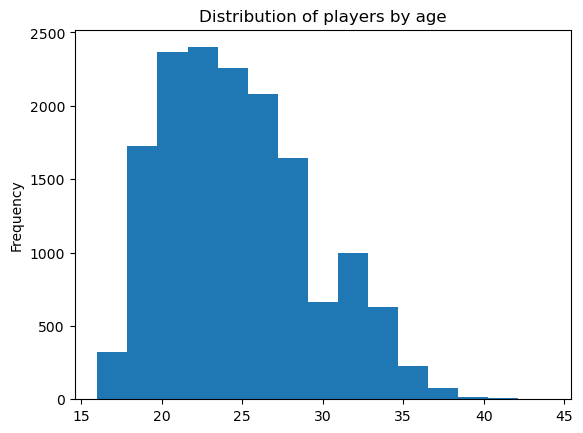

In [81]:
import matplotlib.pyplot as plt
df['age'].plot(kind='hist', bins=15, title='Distribution of players by age')


##### The majority of players are in their late 20s (around 25-29 years old), with a peak around 27.
##### The distribution is slightly skewed to the right, indicating that there are a few older players (in their 30s and 40s) but most players are younger.
##### The age range of the players in the dataset appears to be roughly from 15 to 45 years old.ears old.old.

<Axes: title={'center': 'Distribution of players by height'}, ylabel='Frequency'>

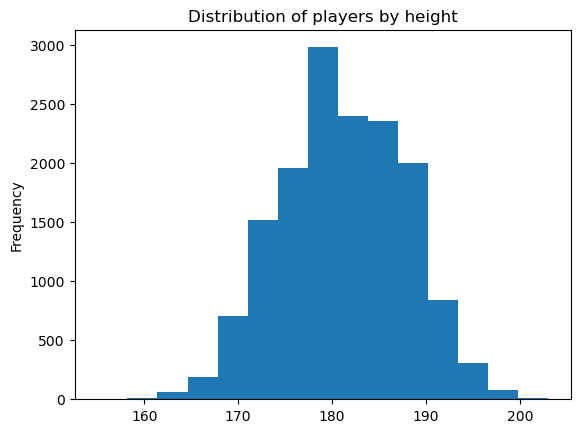

In [120]:
import matplotlib.pyplot as plt
df['height_cm'].plot(kind='hist', bins=15, title='Distribution of players by height')

##### The majority of players have height between 170cm and 190cm, with a peak around 179cm. 
##### The distribution is slightly skewed to the left, indicating that there are very few players that have height around 160 to 170cm. 
##### The height range of the players in the dataset appears to be roughly from 160cm to 200cm. 

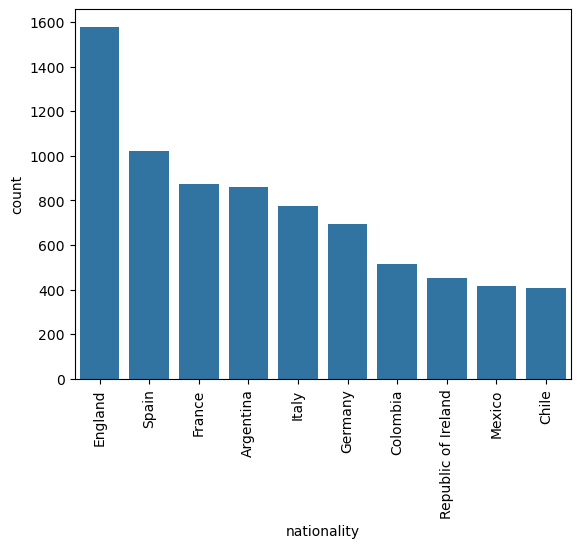

In [85]:
ax = sns.countplot(x ='nationality', data = df, order=df['nationality'].value_counts()[:10].index)
ax.tick_params(axis='x', rotation=90)

##### The above bar chart shows players from different nationalities. From the above bar chart it appears that most of the players are from england, while least people are from chile. 

<Axes: title={'center': 'Average Overall Rating by Preferred Foot'}, xlabel='preferred_foot'>

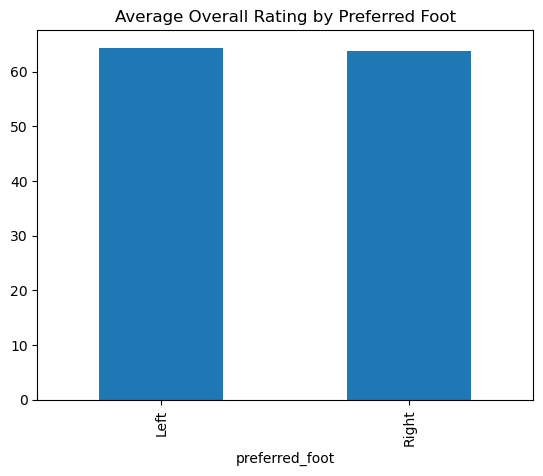

In [87]:
df.groupby('preferred_foot')['overall'].mean().plot(kind='bar', title='Average Overall Rating by Preferred Foot')

##### This shows that the preferred foot of a player does not have a significant impact on their overall performace in the game. Left-footed or right-footed it's your overall commitment to the game that matters. 

### Generating visualization for bivariate anaylysis 

<Axes: title={'center': 'Pace vs Dribbling'}, xlabel='pace', ylabel='dribbling'>

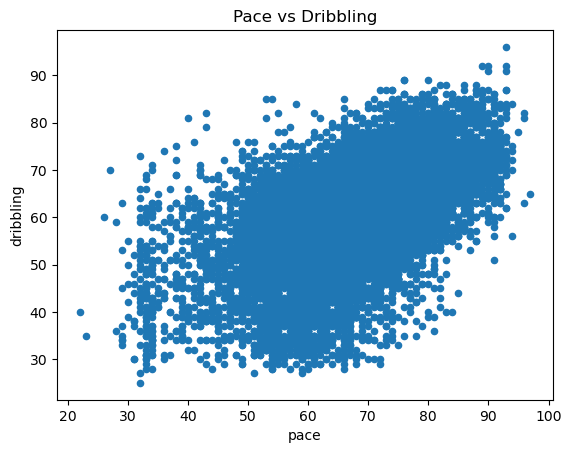

In [90]:
df.plot.scatter(x='pace', y='dribbling', title='Pace vs Dribbling')

##### From the above scatter plot it can be seen that pace and dribbling are positively correlated to some extent but the relationship is not so straightforward and strong. A higher pace does mean that you can move fast and dribble the ball easily but dribbling is dependent on other factors too as well such as your agility, height and fitness. Anylyzing the heatmap below will further provide insights to this relationship. 

Text(0.5, 1.0, 'Overall ratings by body type')

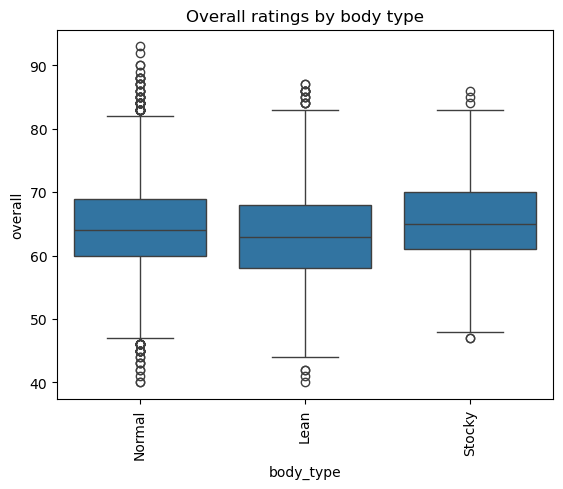

In [92]:
sns.boxplot(x='body_type', y='overall', data=df)
plt.xticks(rotation=90)
plt.title('Overall ratings by body type')

##### The above boxplot reveals that while "Normal" body types have a slightly higher median overall rating, the variability and presence of outliers indicate that body type is not the only sole determinant of player performance. Other factors such as skill, experience, and playing style likely contribute significantly to player ratings. 

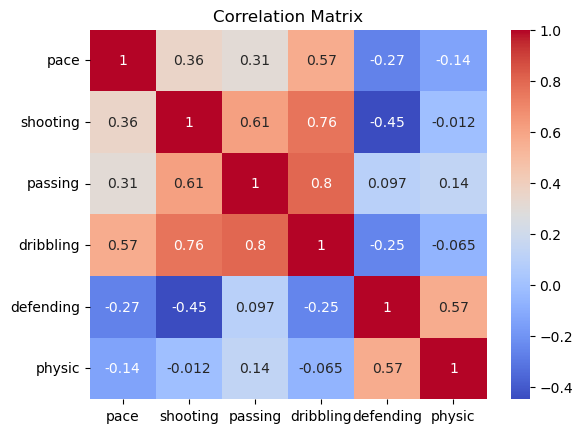

In [97]:
corr = df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### The co-relation matrix tells us that our intial prediction was correct. This is because the value of the correlation coefficient between pace and dribbling is 0.57 which means that there is a tendency for players with higher pace to also have higher dribbling skills.

### Generate appropiate visulization for multivariate visualization

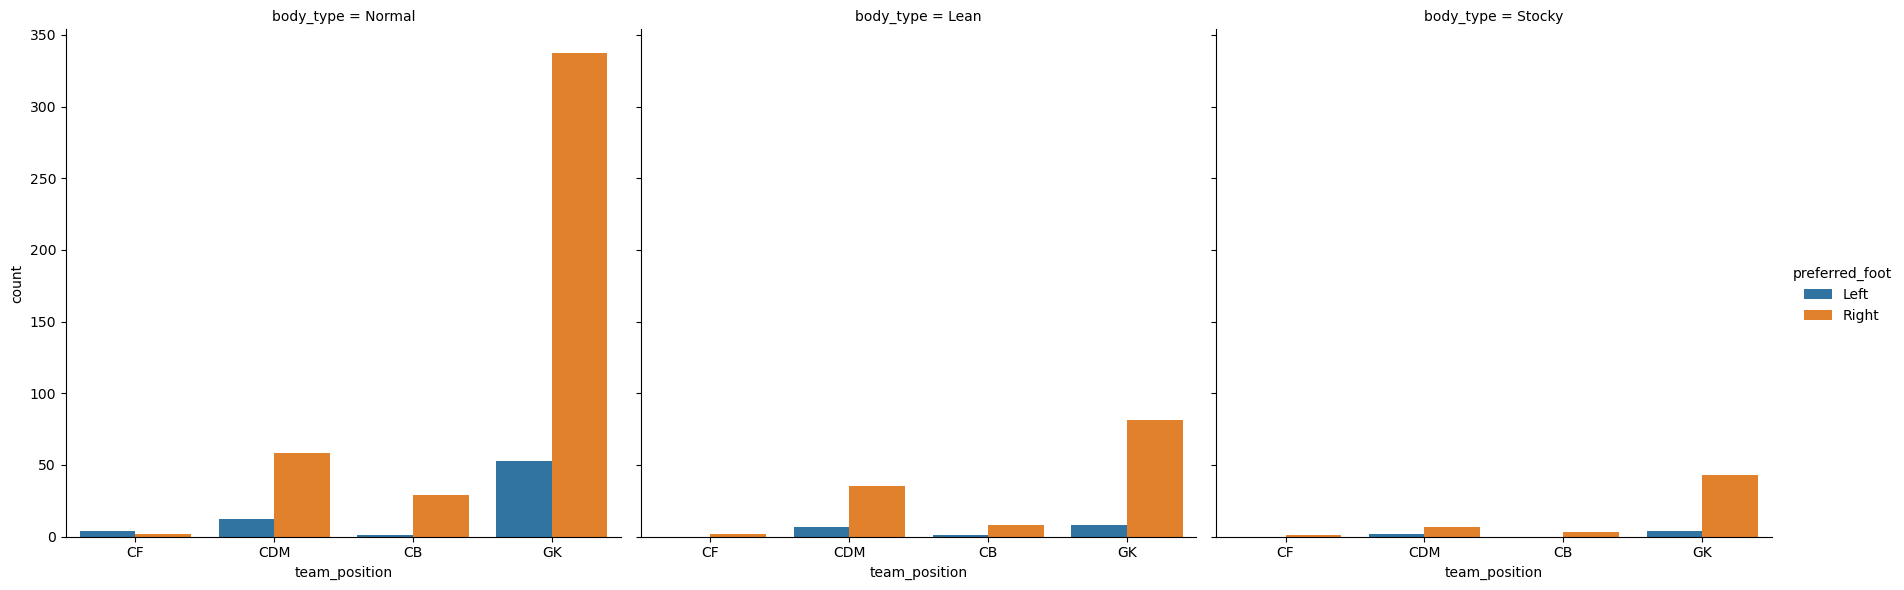

In [102]:
filtered_df = df[df['team_position'].isin(['CF', 'GK', 'CB', 'CDM'])]

# Create the catplot using the filtered DataFrame
sns.catplot(x="team_position", hue="preferred_foot", col="body_type",
            data=filtered_df, kind="count",
            height=6, aspect=1)

##### The categorical plot offers intriguing insights into the distribution of players across various positions, highlighting how factors like body type and foot preference (left- or right-footedness) influence these distributions. Interestingly, the majority of goalkeepers are right-footed, especially those with a "Normal" body type. The plot also suggests that certain body types may be better suited for specific positions. For example, players with a "Stocky" build seem to be more common in roles that demand physical strength and frequent contact. The distribution of players across positions is uneven, with some positions having a higher concentration of players than others. This disparity could be shaped by factors such as player availability, team tactics, or specific skill requirements. Overall, the plot provides valuable insights into how body type, foot preference, and playing position are interconnected, offering useful guidance for player recruitment, team strategies, and talent development initiatives.